In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read dataset
df=pd.read_csv(r'C:\Users\Rahul\Desktop\netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Distribution of content type
Content_type=df['type'].value_counts()

print(Content_type)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [8]:
#  top 10 countries that produce the most content
country_distribution=df['country'].value_counts().head(10)
print(country_distribution)


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [9]:
# Distribution of ratings
rating_distribution = df['rating'].value_counts()
print(rating_distribution)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [10]:
# Splitting the genres and counting their occurrences
genre_series = df['listed_in'].str.split(',').explode()
genre_distribution = genre_series.value_counts().head(10) 

print(genre_distribution)

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convert 'duration' to numerical values
def convert_duration(duration):
    if isinstance(duration, str):
        if 'min' in duration:
            return int(duration.split()[0])
        elif 'Season' in duration:
            return int(duration.split()[0]) * 60
    return 0

df['duration'] = df['duration'].apply(convert_duration)

# Handle missing values
df = df.dropna(subset=['duration', 'release_year'])

# Prepare the features and target
X = df[['duration', 'release_year']]
y = df['type'].map({'Movie': 1, 'TV Show': 0})

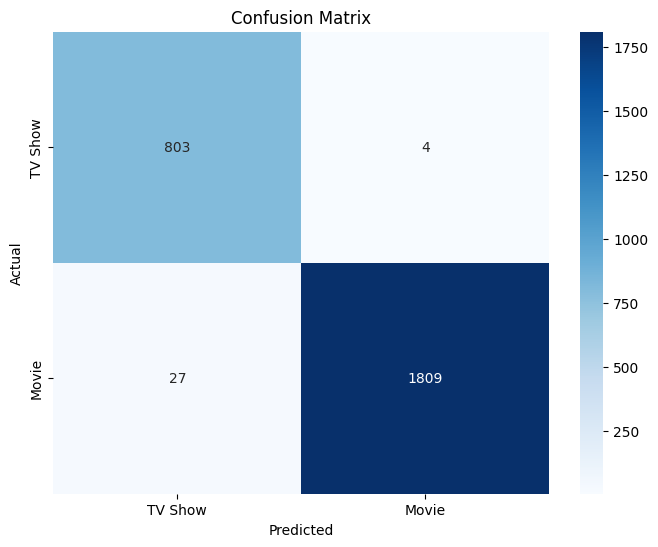

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       807
           1       1.00      0.99      0.99      1836

    accuracy                           0.99      2643
   macro avg       0.98      0.99      0.99      2643
weighted avg       0.99      0.99      0.99      2643



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['TV Show', 'Movie'], yticklabels=['TV Show', 'Movie'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(class_report)

c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

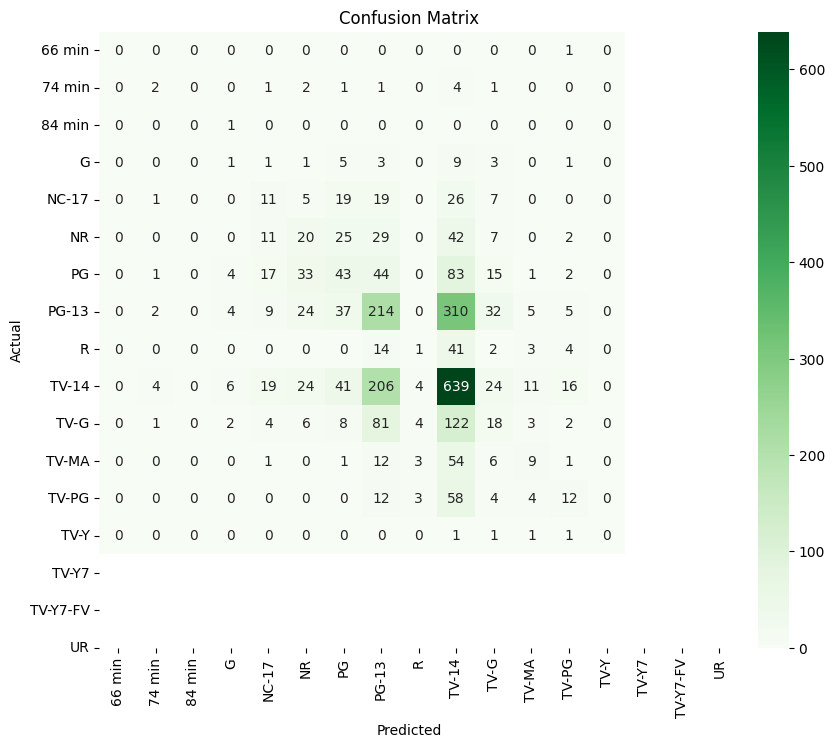

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.18      0.17      0.17        12
           4       0.00      0.00      0.00         1
           5       0.06      0.04      0.05        24
           6       0.15      0.12      0.14        88
           7       0.17      0.15      0.16       136
           8       0.24      0.18      0.20       243
           9       0.34      0.33      0.34       642
          10       0.07      0.02      0.03        65
          11       0.46      0.64      0.54       994
          12       0.15      0.07      0.10       251
          13       0.24      0.10      0.15        87
          14       0.26      0.13      0.17        93
          15       0.00      0.00      0.00         4

    accuracy                           0.37      2641
   macro avg       0.17      0.14      0.15      2641
weighted avg       0.33      0.37      0.34      2641



In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode the rating column
df = df.dropna(subset=['rating'])
le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating'])

# Prepare features and target
X = df[['duration', 'release_year']]
y = df['rating_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(class_report)


In [18]:
# predict whether a show is a "Movie" or "TV Show" based on its attributes like director, cast, country, and listed_in
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

features=['director','cast','country','listed_in']
X=df[features]
y=df['type']

X=X.fillna('unknown')

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000))])
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print('-------------------------------------------------------')
print(f"Classification Report:\n{report}")


Accuracy: 0.9789892106757524
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       Movie       0.97      0.99      0.98      1195
     TV Show       0.99      0.95      0.97       566

    accuracy                           0.98      1761
   macro avg       0.98      0.97      0.98      1761
weighted avg       0.98      0.98      0.98      1761



In [21]:
# predict the likelihood of a show being from a specific country based on attributes like director, cast, listed_in, and rating
feature=['director','cast','rating','listed_in']
X=df[feature]
y=df['country']

X=X.fillna('unknown')
y=y.fillna('unknown')

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), feature)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print('-------------------------------------------------------')
print(f"Classification Report:\n{report}")

Accuracy: 0.48779102782509937
-------------------------------------------------------
Classification Report:
                                                                     precision    recall  f1-score   support

                                                          Argentina       0.00      0.00      0.00        12
                                                   Argentina, Chile       0.00      0.00      0.00         1
                                                   Argentina, Spain       0.00      0.00      0.00         2
                                         Argentina, Uruguay, Serbia       0.00      0.00      0.00         1
                                  Argentina, Uruguay, Spain, France       0.00      0.00      0.00         1
                                                          Australia       0.10      0.07      0.08        14
                                          Australia, United Kingdom       0.00      0.00      0.00         1
                  

c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [23]:
#Top-Rated Movies or TV Shows in a Specific Genre
genre = 'Comedies'
genre_df = df[df['listed_in'].str.contains(genre, case=False, na=False)]

top_rated_df = genre_df.sort_values(by='rating', ascending=False)

top_10 = top_rated_df.head(10)
print(top_10[['title', 'rating']])

                                         title    rating
8790             You Don't Mess with the Zohan        UR
7513                 Motu Patlu: King of Kings  TV-Y7-FV
6581                              Dear Dracula  TV-Y7-FV
7292                              Leo the Lion  TV-Y7-FV
7317       Little Singham aur Kaal ka Mahajaal  TV-Y7-FV
522                                      Larva     TV-Y7
7313  Little Lunch: The Halloween Horror Story     TV-Y7
5144                  Oggy and the Cockroaches     TV-Y7
2236       Little Singham: Legend of Dugabakka     TV-Y7
3295                        Green Eggs and Ham     TV-Y7


In [30]:
#Recommended Movies or TV Shows by a Specific Director
director = 'Steven Spielberg'
director_df = df[df['director'].str.contains(director, case=False, na=False)]

recommended_df = director_df.sort_values(by='rating', ascending=False)

# Display recommendations
print(recommended_df[['title', 'rating', 'listed_in']])

                                                  title rating  \
7957                                   Schindler's List      R   
329                                 Catch Me If You Can  PG-13   
7070  Indiana Jones and the Kingdom of the Crystal S...  PG-13   
7071                 Indiana Jones and the Last Crusade  PG-13   
7308                                            Lincoln  PG-13   
8696                                          War Horse  PG-13   
41                                                 Jaws     PG   
1203                                            The BFG     PG   
7072      Indiana Jones and the Raiders of the Lost Ark     PG   
7073               Indiana Jones and the Temple of Doom     PG   
8184                           The Adventures of Tintin     PG   

                                              listed_in  
7957                             Classic Movies, Dramas  
329                                              Dramas  
7070  Action & Adventure, Childre

C:\Users\Rahul\AppData\Local\Temp\ipykernel_17716\4066117000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=recommended_df, palette='viridis')


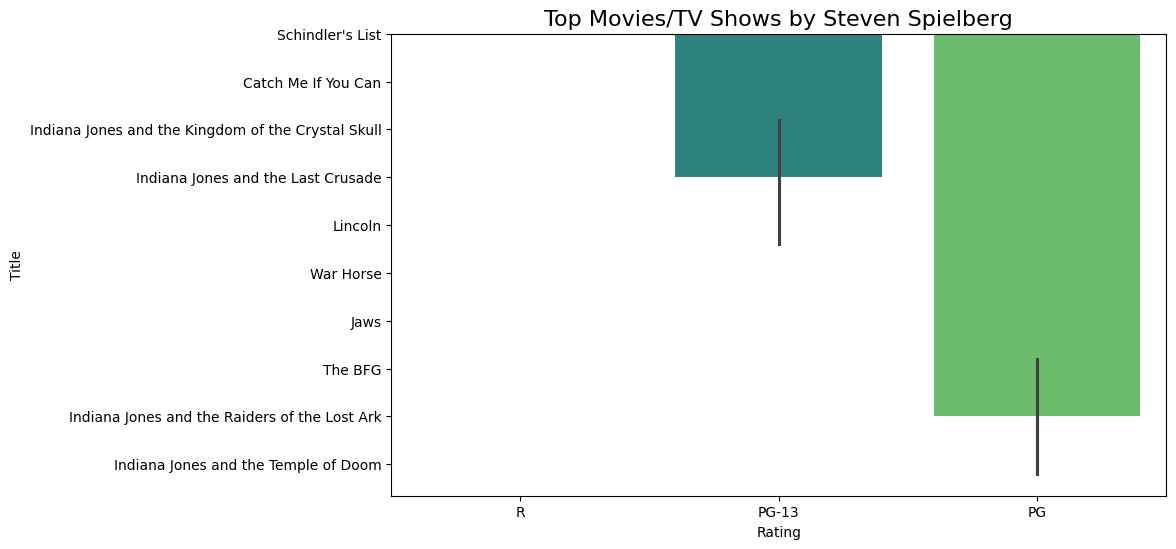

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='title', data=recommended_df, palette='viridis')

plt.title(f'Top Movies/TV Shows by {director}', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Title')

plt.show()